# Activation Functions [4th June 2025]:

- These functions are deciding factor for a neuron activation.
- Neuron Formula as follow: *`Z -> W(i)*X(i) + Bias(i)`* 
- Now in the above formula W(i) are the weight matrix, X(i) are the input matrix and Bias(i) are the respective biases associated.

- Now, in the Deep Learning (or Neural Networks) we cannot directly use this formulas so we pass this formula under the activation functions that means the output (Z) is supposed to pass to the activation function to add the **non-linearity** to the neural network.

- If we **don't** add activation function then NN will behave as a simple linear regression model (that means neurons will be only performing linear transformation)

- Inshort responsible for feed-forwarding.


## Types of Activation Functions:

### 1. Binary Step Function:
- Either 0 or 1
- `f(x) = 0` *for x < 0* | `f(x) = 1` *for x >= 0*

### 2. Linear Activation Function:

- Straight Line: `[-inf, inf]`
- `f(x) = x`
- No activation or Identity Function [this simply spits out the input]

### 3. Non-Linear Activation Functions:

- These allows backpropagation (as the derivative func. can be applied on this)
- There are around 10 Non-Linear act. funcs as follow:

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns, matplotlib.pyplot as plt


**3.1 Sigmoid / Logistic:**

- Sigmoid: `f(x) = 1 / (1 + e^(-x))`
- Sigmoid Range: (0,1)
- Derivative of sigmoid: `g(x) = f'(x) = sigmoid(x)*(1 - sigmoid(x))`
- gradients distri: [-3,3] significant, (-inf, -3) & (3, inf) less significant


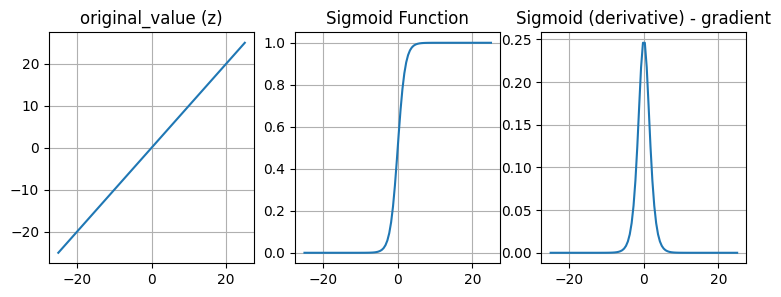

In [81]:
sigmoid = lambda x : (1 / (1 + np.exp(-1*x)))
deri_sigmoid = lambda x : (sigmoid(x) * (1 - sigmoid(x)))


samples = np.linspace(-25,25,100)
op = (sigmoid)(samples)
deri_op = (deri_sigmoid)(samples)
titles= ['original_value (z)', 'Sigmoid Function', 'Sigmoid (derivative) - gradient']
ys = [samples, op, deri_op]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9,3))

for title, y, ax in zip(titles, ys, axes.ravel()):
    ax.plot(samples, y)
    ax.grid(True)
    ax.set_title(title)
plt.show()

**3.2 Tanh:**

- shape similar to sigmoid but range different.
- Tanh range: [-1,1]
- Can see steeper gradients of this funtions compared to that of sigmoid
- strong -ve, 0 or strong +ve: So generally used in hidden layers (makes learning for next layer easier)

formula: 
```
f(x) = (e^x - e^-x) / (e^x + e^-x)
f(x) = 2*sigmoid(2x) - 1

Tanh Derivative:

f'(x) = g(x) = 1 - tanh(x)^2
```








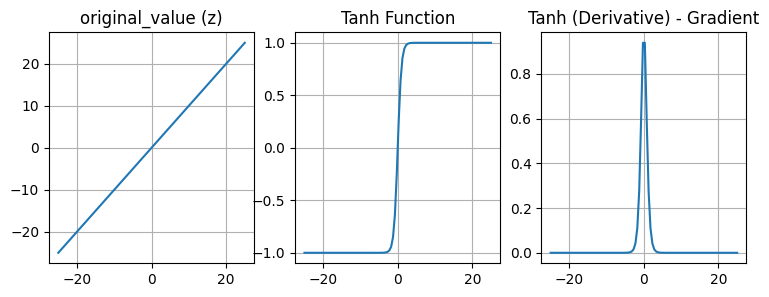

In [83]:
tanh = lambda x : (np.exp(x) - np.exp(-1*x)) / (np.exp(x) + np.exp(-1*x))
deri_tanh = lambda x : (1 - tanh(x)**2)

samples = np.linspace(-25,25,100)
op = (tanh)(samples)
deri_op = (deri_tanh)(samples)
titles= ['original_value (z)', 'Tanh Function', 'Tanh (Derivative) - Gradient']
ys = [samples, op, deri_op]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9,3))

for title, y, ax in zip(titles, ys, axes.ravel()):
    ax.plot(samples, y)
    ax.grid(True)
    ax.set_title(title)
plt.show()


**3.3 ReLU (Rectifier Linear Unit):**

- Looks like linear but still has a derivative function so is capable of backpropogation.
- ReLU: *`f(x) = max(0,x)`* [only certain no. of neurons are activated].

```
f(x) = x, if x >= 0
     = 0, if X < 0

Derivative ReLU (Dying ReLU Problem):

f'(x) = g(x) = 1, if x >= 0
             = 0, if x < 0
```

- **Conclusion:** as we can see gradient for the negative value is *ZERO (0)*. So the weights & bias for some neurons are not updated [dead neurons that never get activated]
  

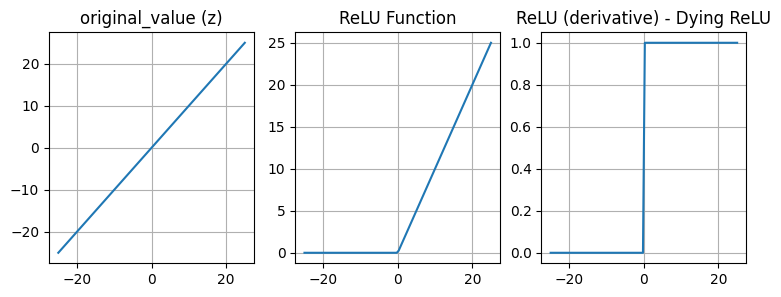

In [84]:
relu = lambda x: np.maximum(0,x)
deri_relu = lambda x: np.where(x >= 0, 1, 0) 

samples = np.linspace(-25,25,100)
op = (relu)(samples)
deri_op = (deri_relu)(samples)
titles= ['original_value (z)', 'ReLU Function', 'ReLU (derivative) - Dying ReLU']
ys = [samples, op, deri_op]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9,3))

for title, y, ax in zip(titles, ys, axes.ravel()):
    ax.plot(samples, y)
    ax.grid(True)
    ax.set_title(title)
plt.show()

**3.4 Leaky ReLU:**

- Improved version of ReLu [unlike ReLU this enables the backpropagation for the negative input values as well]
- This is achieved by adding small amount of positive slope in negative area.

```
Leaky ReLU:

f(x) = max(0.1*x, x)

Gradient (Leaky ReLU) - Derivative:

f'(x) = g(x) = 1,    if x >= 0
             = 0.01, if x < 0
```

- can see difference in gradient for the negative values in the plottings below...

Limitations:
- Predictions may not be consistent for -ve inputs.
- -ve value gradient is too small and makes the learning slow.

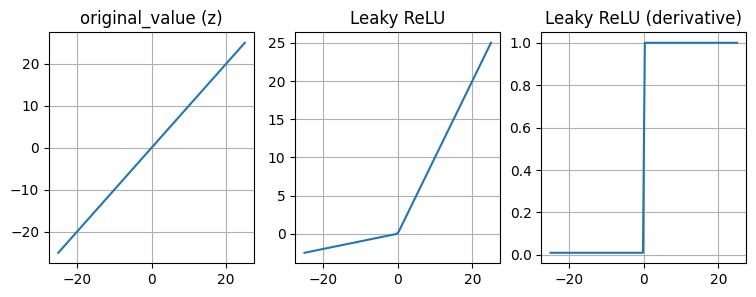

In [91]:
leaky_relu = lambda x: np.maximum(0.1*x, x)
deri_leaky_relu = lambda x: np.where(x>=0,  1, 0.01)

samples = np.linspace(-25,25,100)
op = (leaky_relu)(samples)
deri_op = (deri_leaky_relu)(samples)
titles= ['original_value (z)', 'Leaky ReLU', 'Leaky ReLU (derivative)']
ys = [samples, op, deri_op]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9,3))

for title, y, ax in zip(titles, ys, axes.ravel()):
    ax.plot(samples, y)
    ax.grid(True)
    ax.set_title(title)
plt.show()

**3.5 Parametric ReLU:**

- Another approach to fix the -ve values of ReLU from becoming zero.

```
Parametric ReLU:

f(x) = x, if x >= 0
     = alpha*x, if x < 0


here alpha is trainable parameter which is initialized and updated via backpropagation.
```

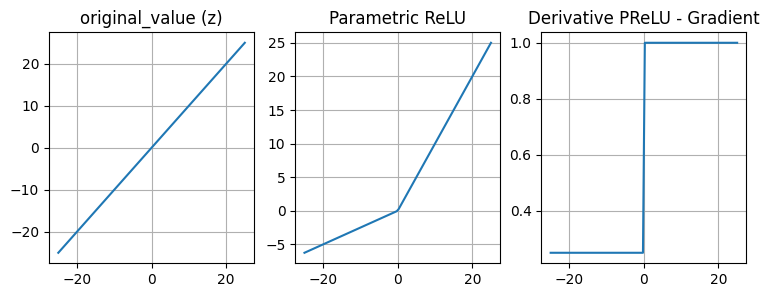

In [124]:
parametric_relu = lambda x, alpha=0.25: np.where(x>=0, x, alpha*x)
# as of now keeping alpha constant but during learning the alpha is updated with the backpropagation.
deri_parametric_relu = lambda x, alpha=0.25: np.where(x>=0, 1, alpha)


samples = np.linspace(-25,25,100)
op = (parametric_relu)(samples)
deri_op = (deri_parametric_relu)(samples)
titles= ['original_value (z)', 'Parametric ReLU', 'Derivative PReLU - Gradient']
ys = [samples, op, deri_op]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9,3))

for title, y, ax in zip(titles, ys, axes.ravel()):
    ax.plot(samples, y)
    ax.grid(True)
    ax.set_title(title)
plt.show()

**3.6 Exponential Linear Unit [ELU]:**

- This also modifies the slope of the negative inputs. It uses log curve to define the negative values unlike Leaky & parametric RELUs with straight line.
- There are various kind of ELU based activation functions like softmax, softplus, swish, gelu, etc...

```
ELU:

f(x) = x,               if x >=0
     = alpha*(exp(x) - 1), if x < 0


Derivative [ELU]:

f'(X) = g(x) = 1, if x >= 0
             = f(x) + alpha, if x < 0 

```

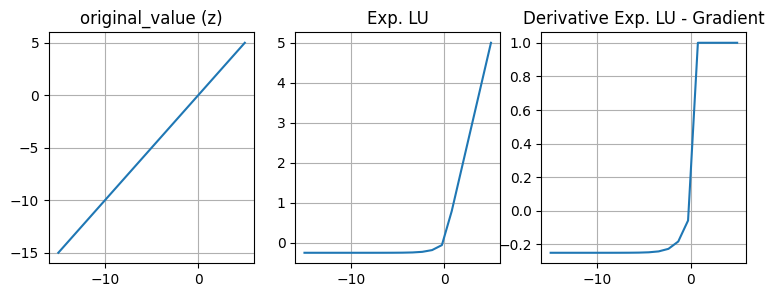

In [110]:
elu = lambda x, alpha=0.25 : np.where(x>=0, x, alpha*(np.exp(x) - 1))
deri_elu = lambda x, alpha=0.25 : np.where(x>=0, 1, elu(x, alpha))


samples = np.linspace(-15,5,20)
op = (elu)(samples)
deri_op = (deri_elu)(samples)
titles= ['original_value (z)', 'Exp. LU', 'Derivative Exp. LU - Gradient']
ys = [samples, op, deri_op]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9,3))

for title, y, ax in zip(titles, ys, axes.ravel()):
    ax.plot(samples, y)
    ax.grid(True)
    ax.set_title(title)
plt.show()

**3.7 Softmax:**

- This is used to handle multi-class classification problems.
- like sigmoid gives the probability values (0 to 1) can be used for binary classification. Softmax canbe considered as a combination of multiple sigmoids.
- This will return the probability of each class.
- Commonly used in last layer of NN for such problems...

```
softmax(z) = exp(z) / sum(exp(z))

There will be k-elements sum (k - classes)
```

SUM of all the Softmax Outputs: 1.0 [gives prob. so should be 1]


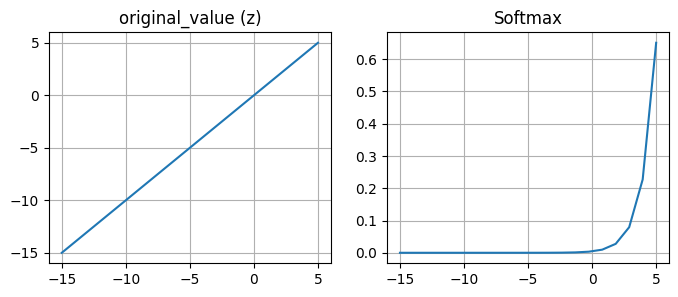

In [127]:
softmax = lambda z: np.exp(z) / np.sum(np.exp(z))

samples = np.linspace(-15,5,20)
op = softmax(samples)
titles= ['original_value (z)', 'Softmax']
ys = [samples, op]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,3))

print(f"SUM of all the Softmax Outputs: {op.sum()} [gives prob. so should be 1]")
for title, y, ax in zip(titles, ys, axes.ravel()):
    ax.plot(samples, y)
    ax.grid(True)
    ax.set_title(title)
plt.show()

**3.8 SoftPlus:**

- output always +ve & differentiable at all points.
- adv.: smoothness (compare to ReLU)...
- Range: (0, inf) [same as ReLU but no hard zero]

```
f(x) = log(1 + exp(x))
```

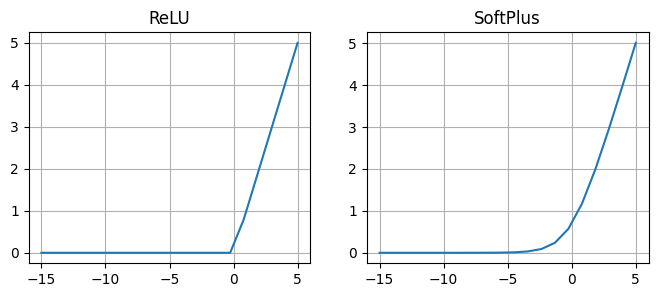

In [131]:
softplus = lambda x : np.log(1 + np.exp(x))


samples = np.linspace(-15,5,20)
op = softplus(samples)
relu_op = relu(samples)
titles= ['ReLU', 'SoftPlus']
ys = [relu_op, op]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,3))

for title, y, ax in zip(titles, ys, axes.ravel()):
    ax.plot(samples, y)
    ax.grid(True)
    ax.set_title(title)
plt.show()

**3.9 Swish:**

- self-gated activation function.
- can be used at image classification, machine translation, etc.
- It outperforms ReLU.

```
f(x) = x / (1 + exp(-x)) = x * sigmoid(x)
```

- comparing with ReLU, swish doesnot directly change the direction towards 0 but bends smoothly...

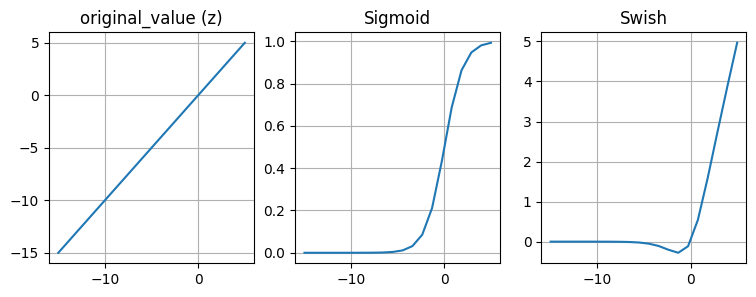

In [128]:
swish = lambda x: x * sigmoid(x)

samples = np.linspace(-15,5,20)
sigmoid_op = sigmoid(samples)
swish_op = swish(samples)
titles= ['original_value (z)', 'Sigmoid', 'Swish']
ys = [samples, sigmoid_op, swish_op]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9,3))

for title, y, ax in zip(titles, ys, axes.ravel()):
    ax.plot(samples, y)
    ax.grid(True)
    ax.set_title(title)
plt.show()

**3.10 Gaussian Error Linear Unit:**

- Compatible with *BERT, ROBERT, ALBERT, etc* top NLP models.
- GeLU is better than ReLU & ELU activations in the domains like computer vision, NLP and speech recognition.

```
f(x) = 0.5*x*(1 + tanh[sqrt(2/pi)*(x + 0.044715*x^3)])
```

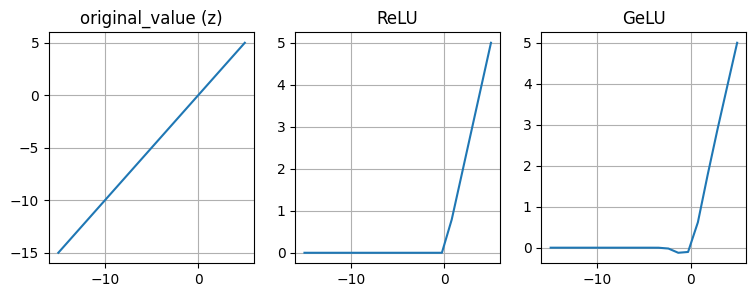

In [129]:
gelu = lambda x: 0.5*x*( 1 + tanh(np.sqrt(2 / np.pi) * (x + 0.044715*(x**3))))


samples = np.linspace(-15,5,20)
op = gelu(samples)
relu_op = relu(samples)
titles= ['original_value (z)', 'ReLU', 'GeLU']
ys = [samples, relu_op, op]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9,3))

for title, y, ax in zip(titles, ys, axes.ravel()):
    ax.plot(samples, y)
    ax.grid(True)
    ax.set_title(title)
plt.show()


---
Notes by Kirtan Ghelani <sup>@SculptSoft 4th June 2025</sup>
